把二维数据编程一维，只使用了numpy,没有引入sklearn中的PCA方法。

In [2]:
import numpy as np
import matplotlib.pyplot as plt

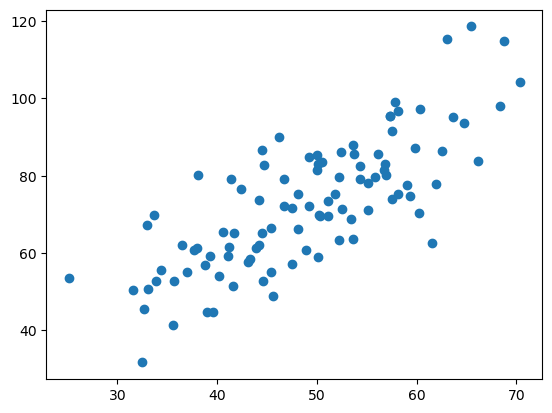

(100,)


In [3]:
#载入数据


data=np.genfromtxt("data.csv",delimiter=",")
#使用NumPy的genfromtxt函数读取名为data.csv的文件，
#delimiter=","指定了数据的分隔符为逗号。
#返回的data是一个数组，包含CSV文件中的所有数据。
x_data=data[:,0]
#提取data数组中的第一列，赋值给x_data
y_data=data[:,1]
#提取data数组中的第二列，赋值给y_data
plt.scatter(x_data,y_data)
plt.show()
print(x_data.shape)

In [4]:
#数据中心化
def zeroMean(dataMat):
    #按列求平均，即各个特征平均
    meanVal=np.mean(dataMat,axis=0)
    #使用 NumPy 的 mean 函数计算 dataMat 每一列的均值（即每个特征的均值）。
    #axis=0 表示沿着列的方向计算均值。
    newData=dataMat-meanVal
    return newData,meanVal

In [5]:
newData,meanVal=zeroMean(data)
#np.cov用于求协方差矩阵
#rowvar=0参数表示每一列代表一个变量（特征），每一行代表一个观测值
covMat=np.cov(newData,rowvar=0)

In [6]:
covMat#协方差矩阵

array([[ 94.99190951, 125.62024804],
       [125.62024804, 277.49520751]])

In [7]:
#np.linalg.eig求矩阵的特征值和特征向量
eigVals,eigVects=np.linalg.eig(np.mat(covMat))

In [8]:
#特征值
eigVals

array([ 30.97826888, 341.50884814])

In [9]:
#特征向量
eigVects

matrix([[-0.89098665, -0.45402951],
        [ 0.45402951, -0.89098665]])

In [10]:
#对特征值从小到大排序
eigValIndice=np.argsort(eigVals)

In [11]:
eigValIndice

array([0, 1], dtype=int64)

In [12]:
top=1
#最大的top个特征值的下标
n_eigValIndice=eigValIndice[-1:-(top+1):-1]
#-1表示从最后一个元素开始提取。
#-(top+1)表示提取的结束位置，通常top是希望保留的特征数。
#-1表示步长为-1，意味着反向提取元素

In [13]:
n_eigValIndice

array([1], dtype=int64)

In [14]:
#最大的top个特征值对应的特征向量
n_eigVect=eigVects[:,n_eigValIndice]
n_eigVect

matrix([[-0.45402951],
        [-0.89098665]])

In [15]:
#将中心化后的数据投影到低维空间
lowDDataMat=newData*n_eigVect
lowDDataMat

matrix([[ 44.02694787],
        [  1.49722533],
        [  3.35564513],
        [  1.73205523],
        [-17.84406034],
        [ -7.68710859],
        [ -7.6311404 ],
        [ 16.4703207 ],
        [ -1.92574891],
        [ -0.35289859],
        [ 17.26071108],
        [-11.13030667],
        [ 11.73358623],
        [ -6.54975245],
        [-11.27989566],
        [ 10.70315359],
        [ -7.11092921],
        [-27.10646295],
        [ 22.80011879],
        [ 18.73367246],
        [-17.75232043],
        [-48.32951839],
        [ 14.46601408],
        [ 22.36856421],
        [ -3.66790828],
        [ -6.5367338 ],
        [-24.03511973],
        [-26.696945  ],
        [ -4.62040617],
        [-10.25663202],
        [  6.87141913],
        [ 33.98731832],
        [ -0.49795028],
        [-25.59431857],
        [ -5.08219623],
        [  7.07400117],
        [-10.3589004 ],
        [ 26.81843789],
        [ 15.13930397],
        [ 15.74751369],
        [ 19.86509486],
        [ 15.181

In [17]:
#利用低维度数据来重构数据，重构是为了比较与原始数据之间的差异
reconMat=(lowDDataMat*n_eigVect.T)+meanVal
reconMat

matrix([[ 28.96880808,  33.50762783],
        [ 48.27855698,  71.40104277],
        [ 47.43477956,  69.74521555],
        [ 48.17193728,  71.19181247],
        [ 57.06007136,  88.63387007],
        [ 52.44851558,  79.58416168],
        [ 52.42310436,  79.53429476],
        [ 41.4803299 ,  58.06021471],
        [ 49.83268829,  74.45086712],
        [ 49.11856784,  73.04947849],
        [ 41.12146934,  57.35598744],
        [ 54.0118291 ,  82.65200519],
        [ 43.6309471 ,  62.28058188],
        [ 51.93212233,  78.57079254],
        [ 54.07974691,  82.78528698],
        [ 44.09879393,  63.19868361],
        [ 52.18691313,  79.07079354],
        [ 61.26547544,  96.88654713],
        [ 38.6064148 ,  52.42044913],
        [ 40.45270141,  56.04359851],
        [ 57.01841873,  88.55213104],
        [ 70.90136881, 115.79600617],
        [ 42.39034424,  59.84602515],
        [ 38.80235331,  52.80495849],
        [ 50.62368004,  76.00310786],
        [ 51.92621148,  78.55919309],
        [ 59

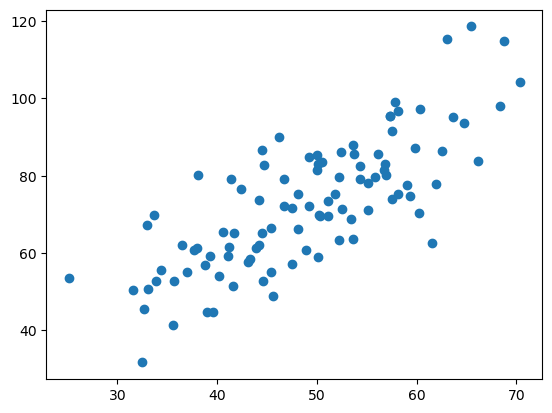

In [18]:
#载入数据
data=np.genfromtxt("data.csv",delimiter=",")
x_data=data[:,0]
y_data=data[:,1]
plt.scatter(x_data,y_data)

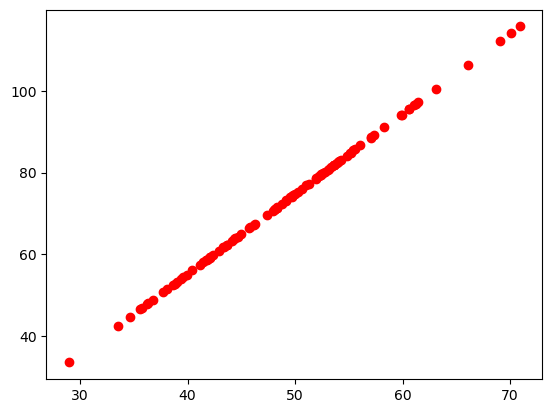

In [19]:
#重构的数据
x_data=np.array(reconMat)[:,0]
y_data=np.array(reconMat)[:,1]
plt.scatter(x_data,y_data,c='r')
plt.show()